In [5]:
%matplotlib inline
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# prepare object points
NX = 9
NY = 6


def get_prepared_object_points():
    objpoints = np.zeros((NX * NY, 3), np.float32)
    objpoints[:, :2] = np.mgrid[0:NX, 0:NY].T.reshape(-1, 2)
    return objpoints


def _get_image_corners(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (NX, NY), None)
    if ret:
        return corners
    return None


def _get_calibration_points():
    images_points = []
    objects_points = []
    image_paths = glob.glob(r'./camera_cal/*.jpg')
    for image_path in image_paths:
        image = plt.imread(image_path)
        corners = _get_image_corners(image=image)
        if corners is not None:
            images_points.append(corners)
            objects_points.append(get_prepared_object_points())
    return objects_points, images_points


obj_points, img_points = _get_calibration_points()


def get_undistorted_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    undistorted_image = cv2.undistort(image, mtx, dist, None, mtx)
    return undistorted_image




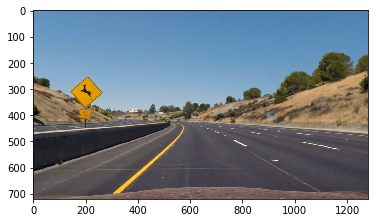

In [10]:
img = plt.imread('./test_images/test2.jpg')

undistorted = get_undistorted_image(img)
plt.imshow(undistorted)

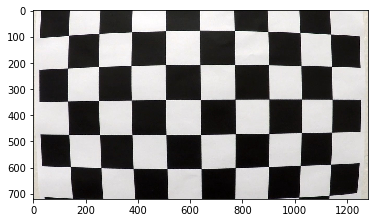

In [9]:
plt.imshow(img)

In [15]:
def get_edges(image, threshold=100):
    sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0)
    scaled_sobel = np.uint8(255 * sobel / np.max(sobel))

    thresh_min = 50
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxbinary

def get_white_line(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    V = hsv[:, :, 2]
    thresh = (220,255)
    binary = np.zeros_like(V)
    binary[(V > thresh[0]) & (V <= thresh[1])] = 1
    return binary

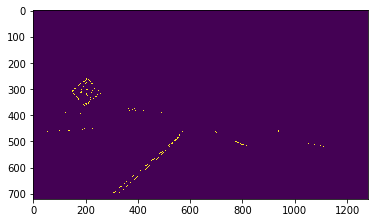

In [17]:
plt.imshow(get_edges(get_white_line(undistorted)))

In [24]:
import numpy as np
import cv2

BOTTOM_LEFT = (265, 700)
BOTTOM_RIGHT = (1130, 700)
TOP_LEFT = (510, 525)
TOP_RIGHT = (845, 525)

SRC = np.float32([
    BOTTOM_LEFT,
    BOTTOM_RIGHT,
    TOP_LEFT,
    TOP_RIGHT
])

DST = np.float32([
    BOTTOM_LEFT,
    BOTTOM_RIGHT,
    (265, 525),
    (1130, 525),
])

M = cv2.getPerspectiveTransform(SRC, DST)
M_INV = cv2.getPerspectiveTransform(DST, SRC)

def get_top_down_view(image):
    undistorted_image = image
    warped = cv2.warpPerspective(undistorted_image, M, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return warped


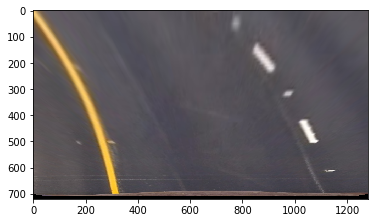

In [25]:
plt.imshow(get_top_down_view(undistorted))